In [ ]:
!nvidia-smi

Mon Jun  5 17:06:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.0 MB/s eta 0:00:00


In [ ]:
from IPython import display
display.clear_output()

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/YOLO/

/content/drive/MyDrive/YOLO


In [ ]:
!ls

 data   data.yaml   Images  'YOLO V8.ipynb'


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=12 imgsz=224
plots=True

100% 21.5M/21.5M [00:00<00:00, 140MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=12, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=

In [ ]:
!ls runs/detect/train/

args.yaml					    R_curve.png
confusion_matrix.png				    results.csv
events.out.tfevents.1685984839.93f8f228d785.2815.0  val_batch0_labels.jpg
F1_curve.png					    val_batch0_pred.jpg
P_curve.png					    weights
PR_curve.png


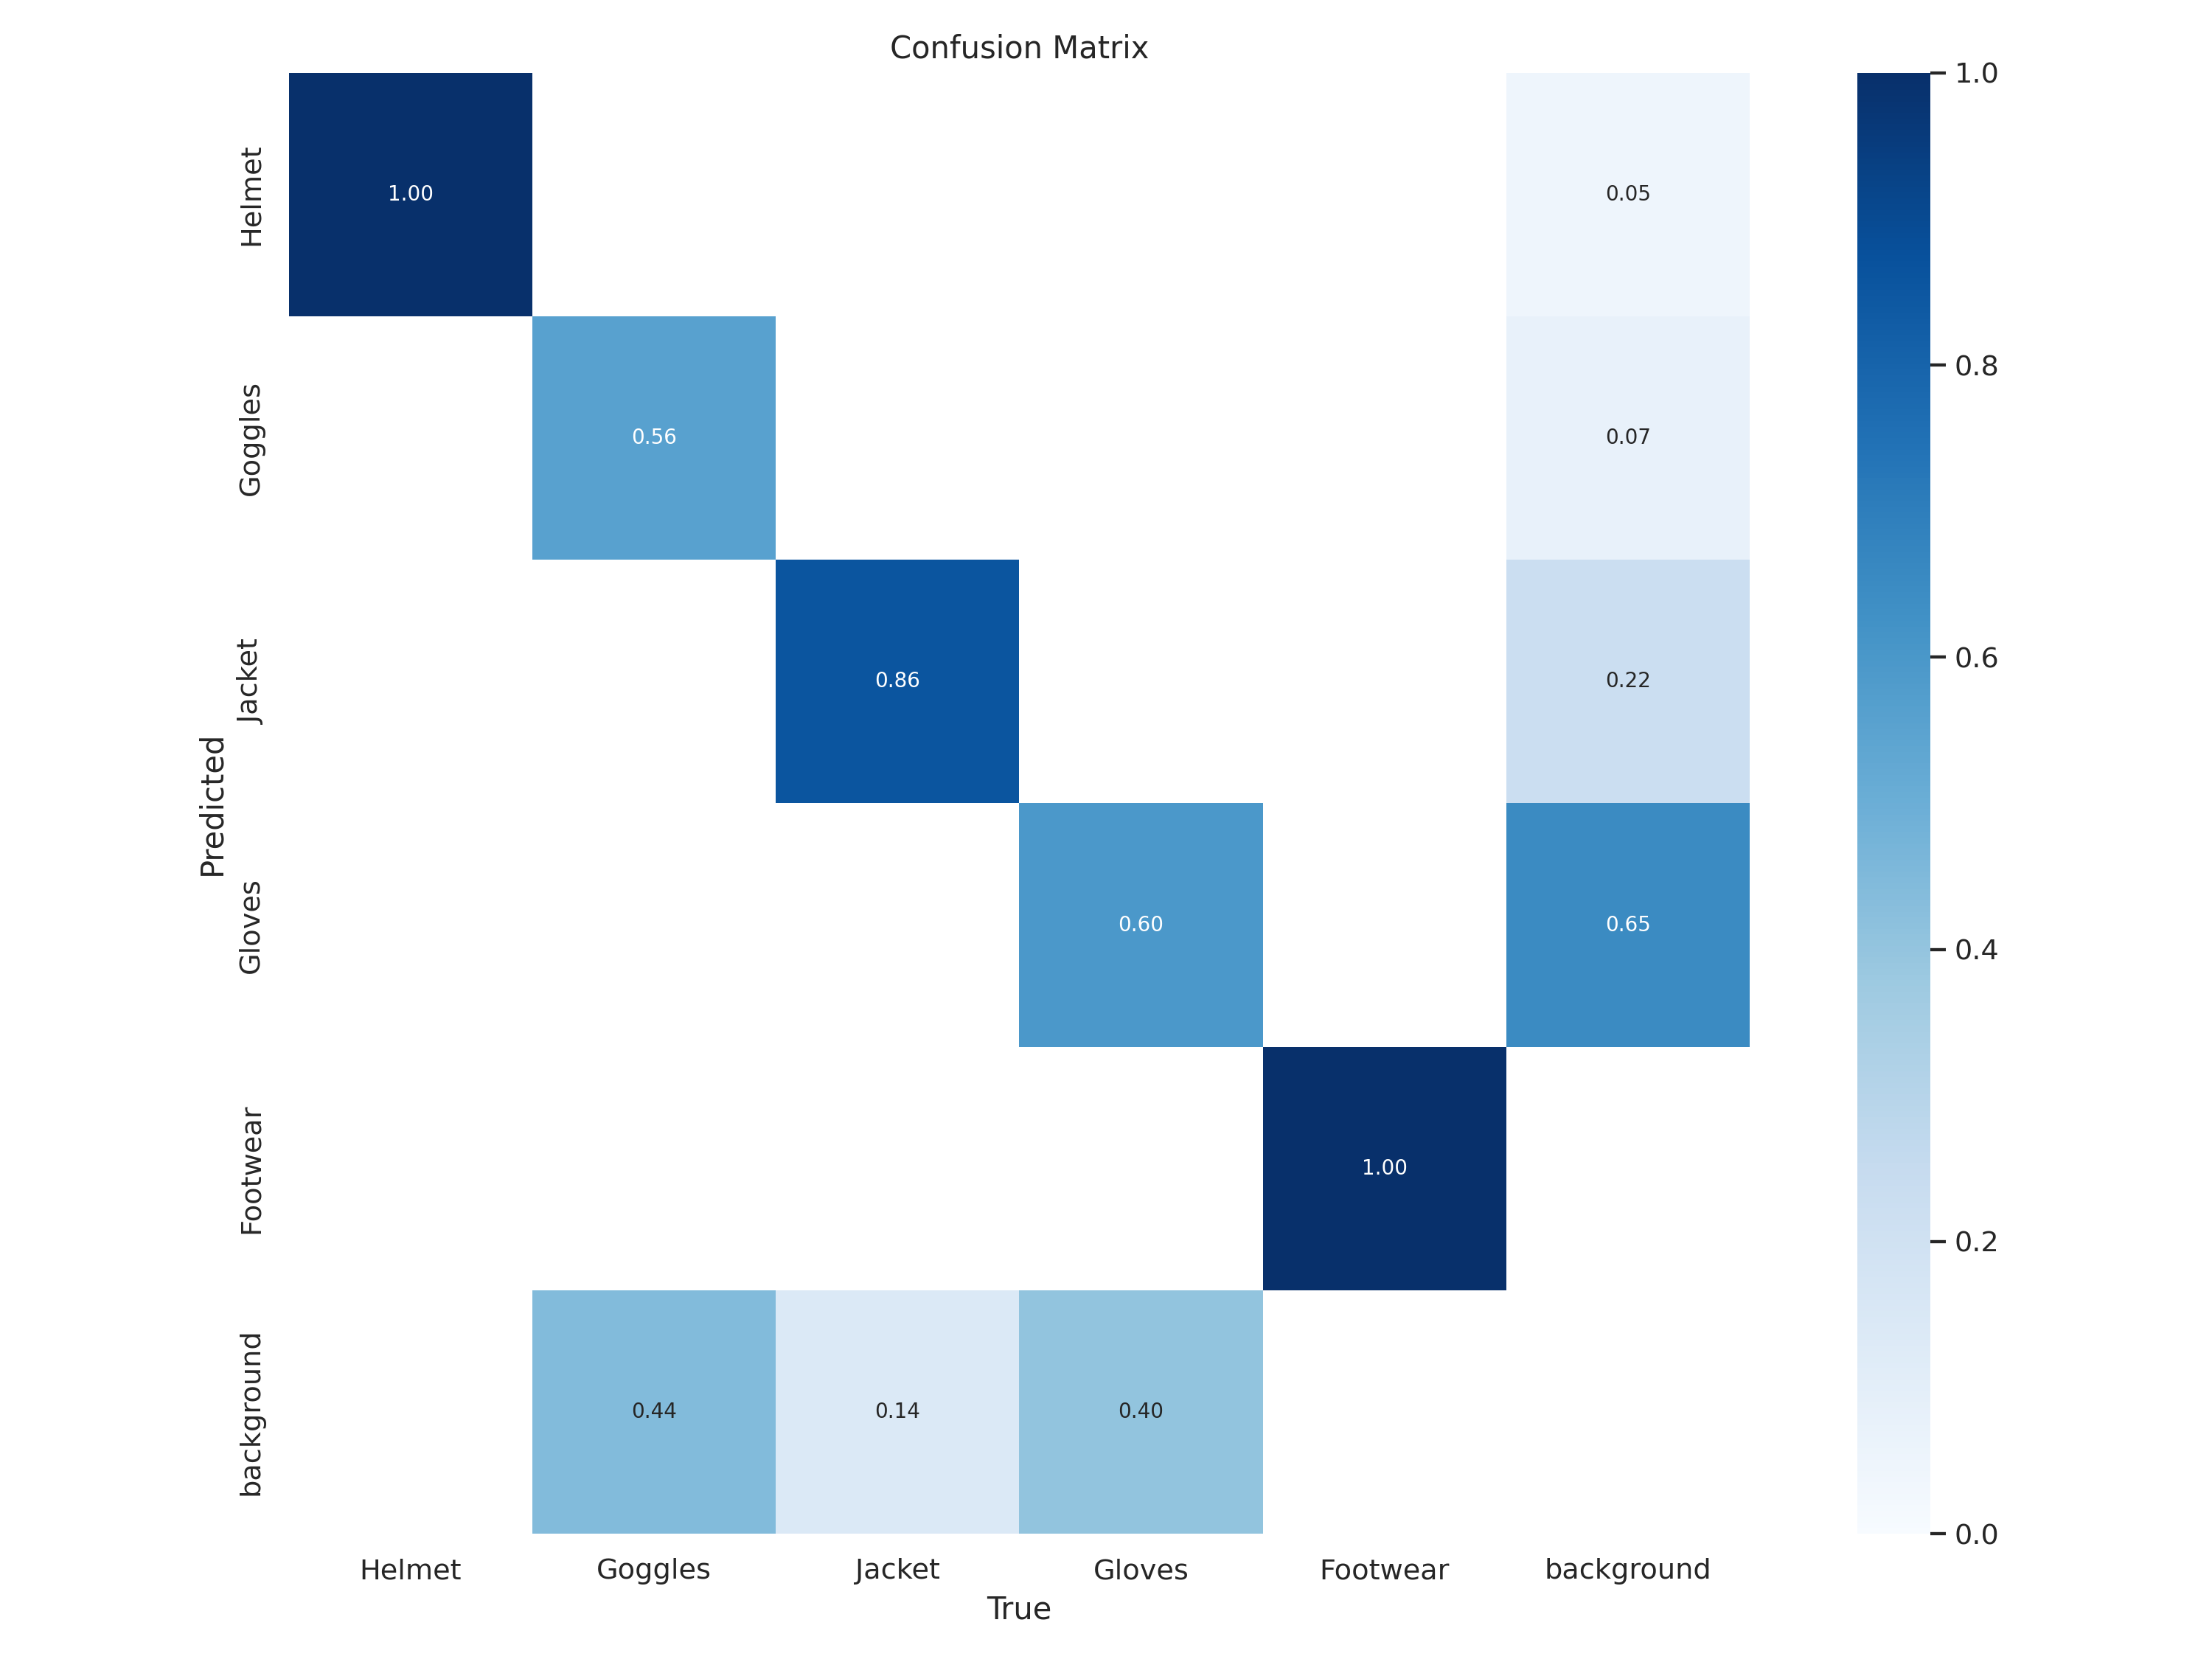

In [ ]:
Image(filename='/content/drive/MyDrive/YOLO/runs/detect/train/confusion_matrix.png',width=650)

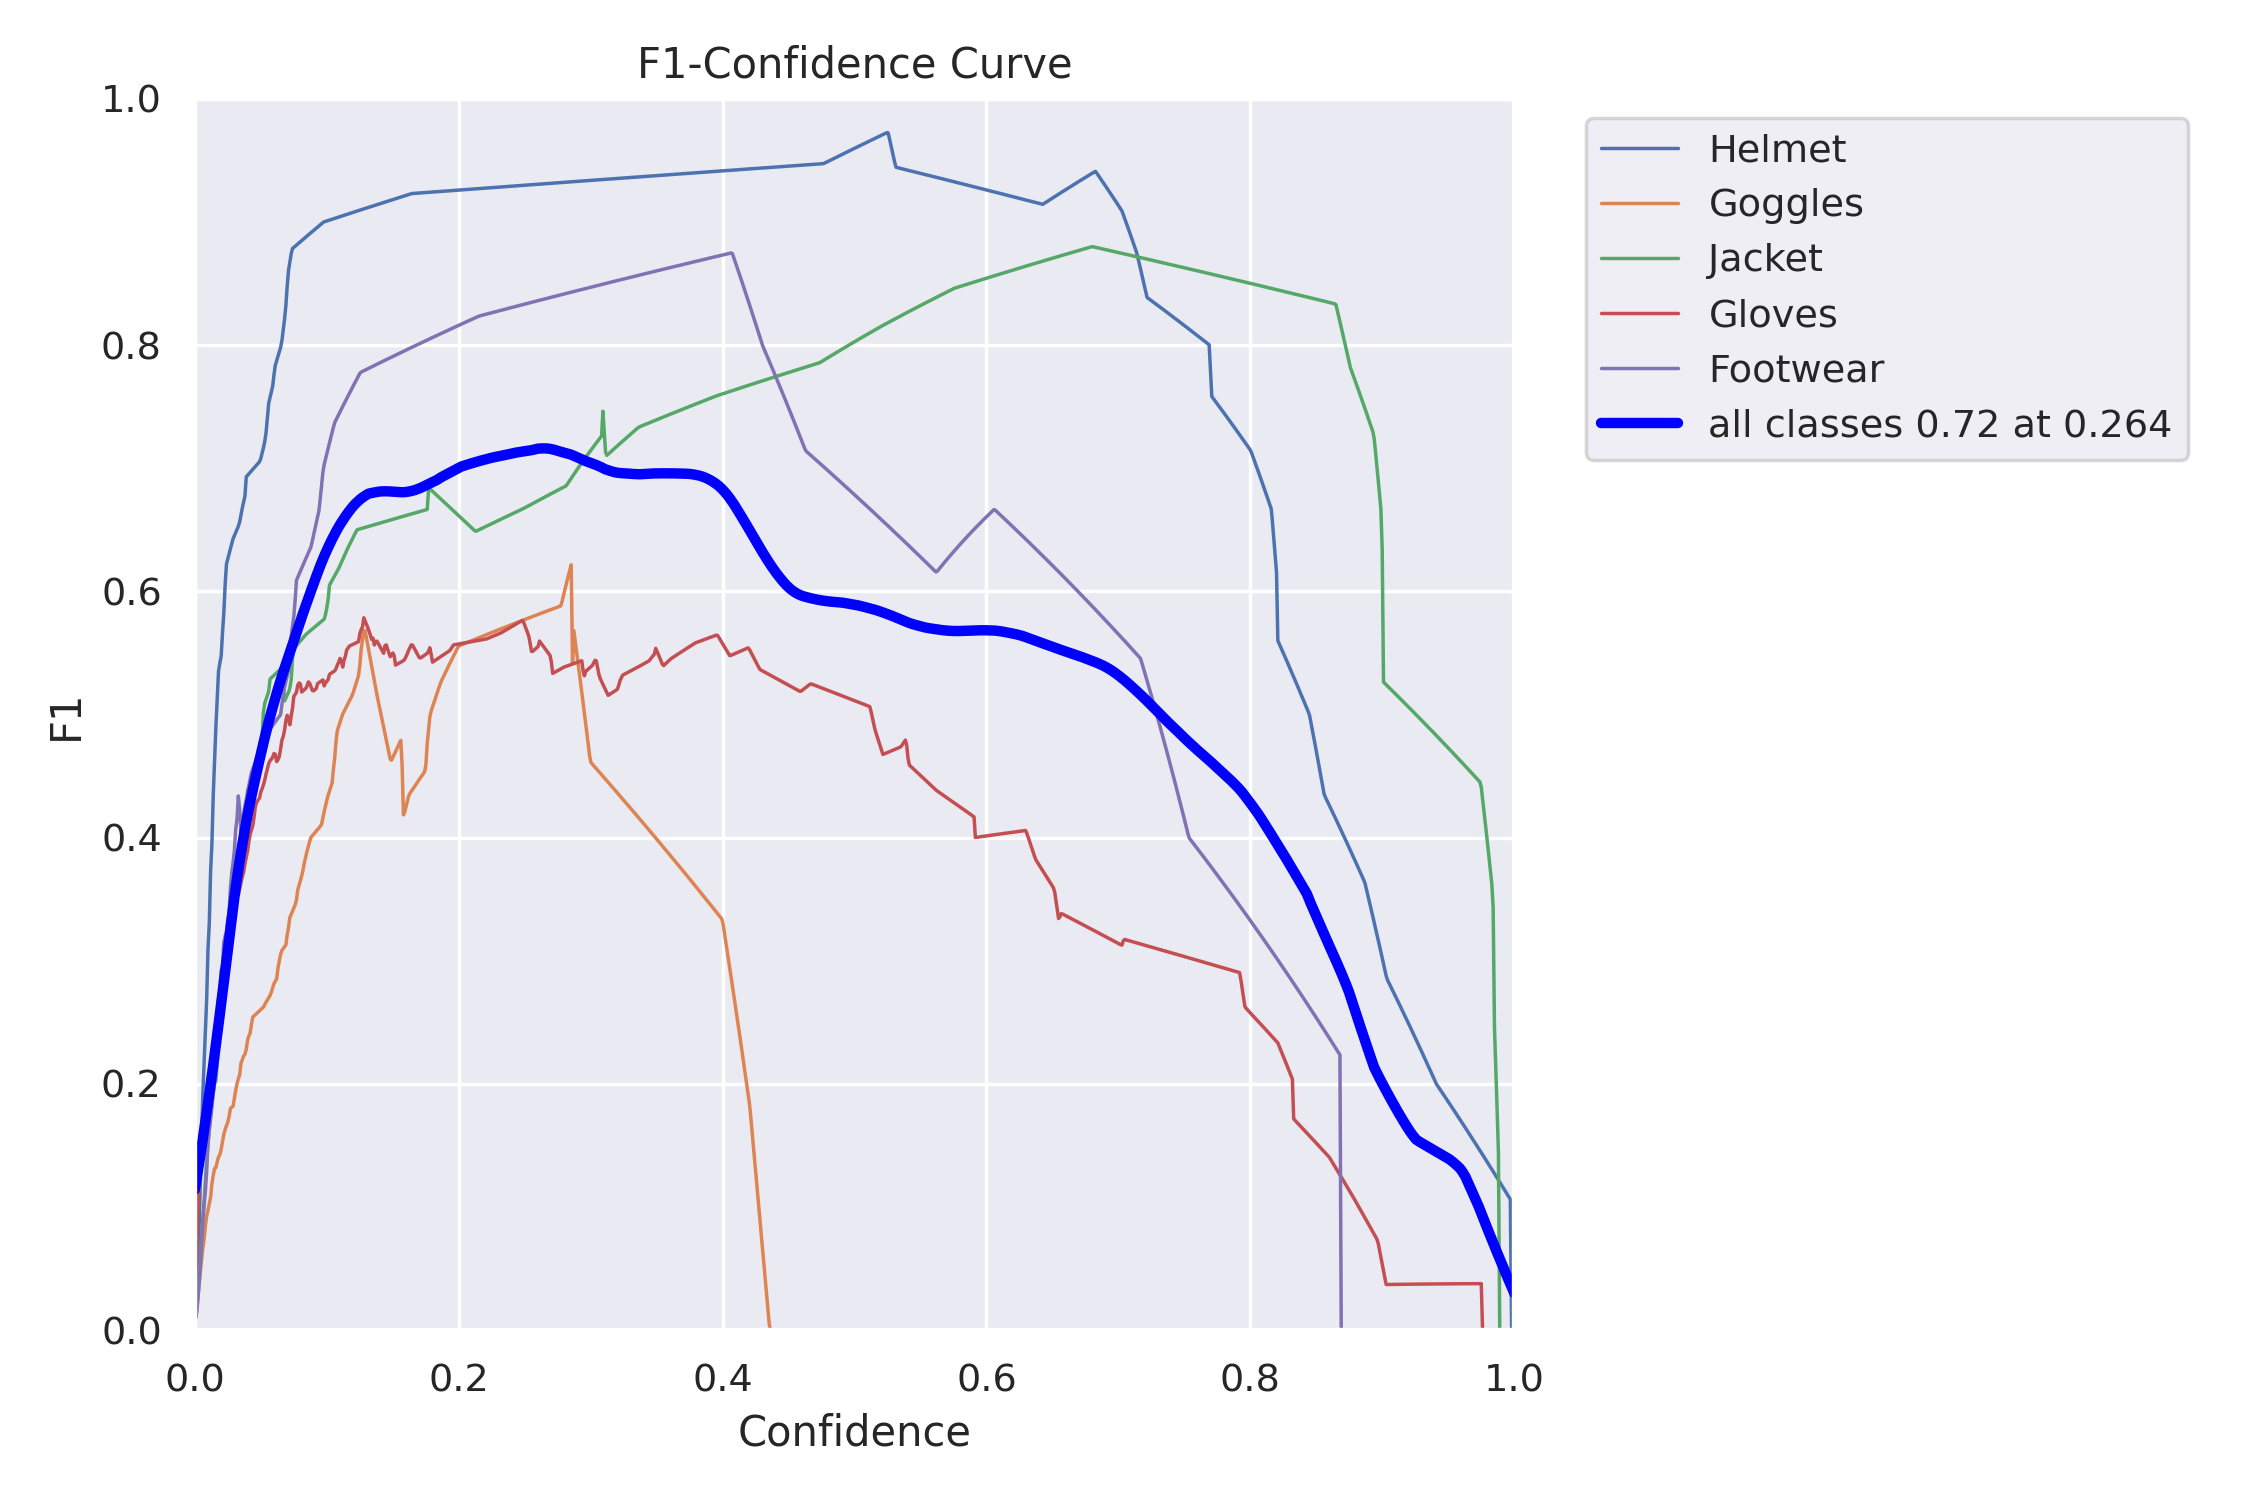

In [ ]:
Image(filename='/content/drive/MyDrive/YOLO/runs/detect/train/F1_curve.png',width=650)

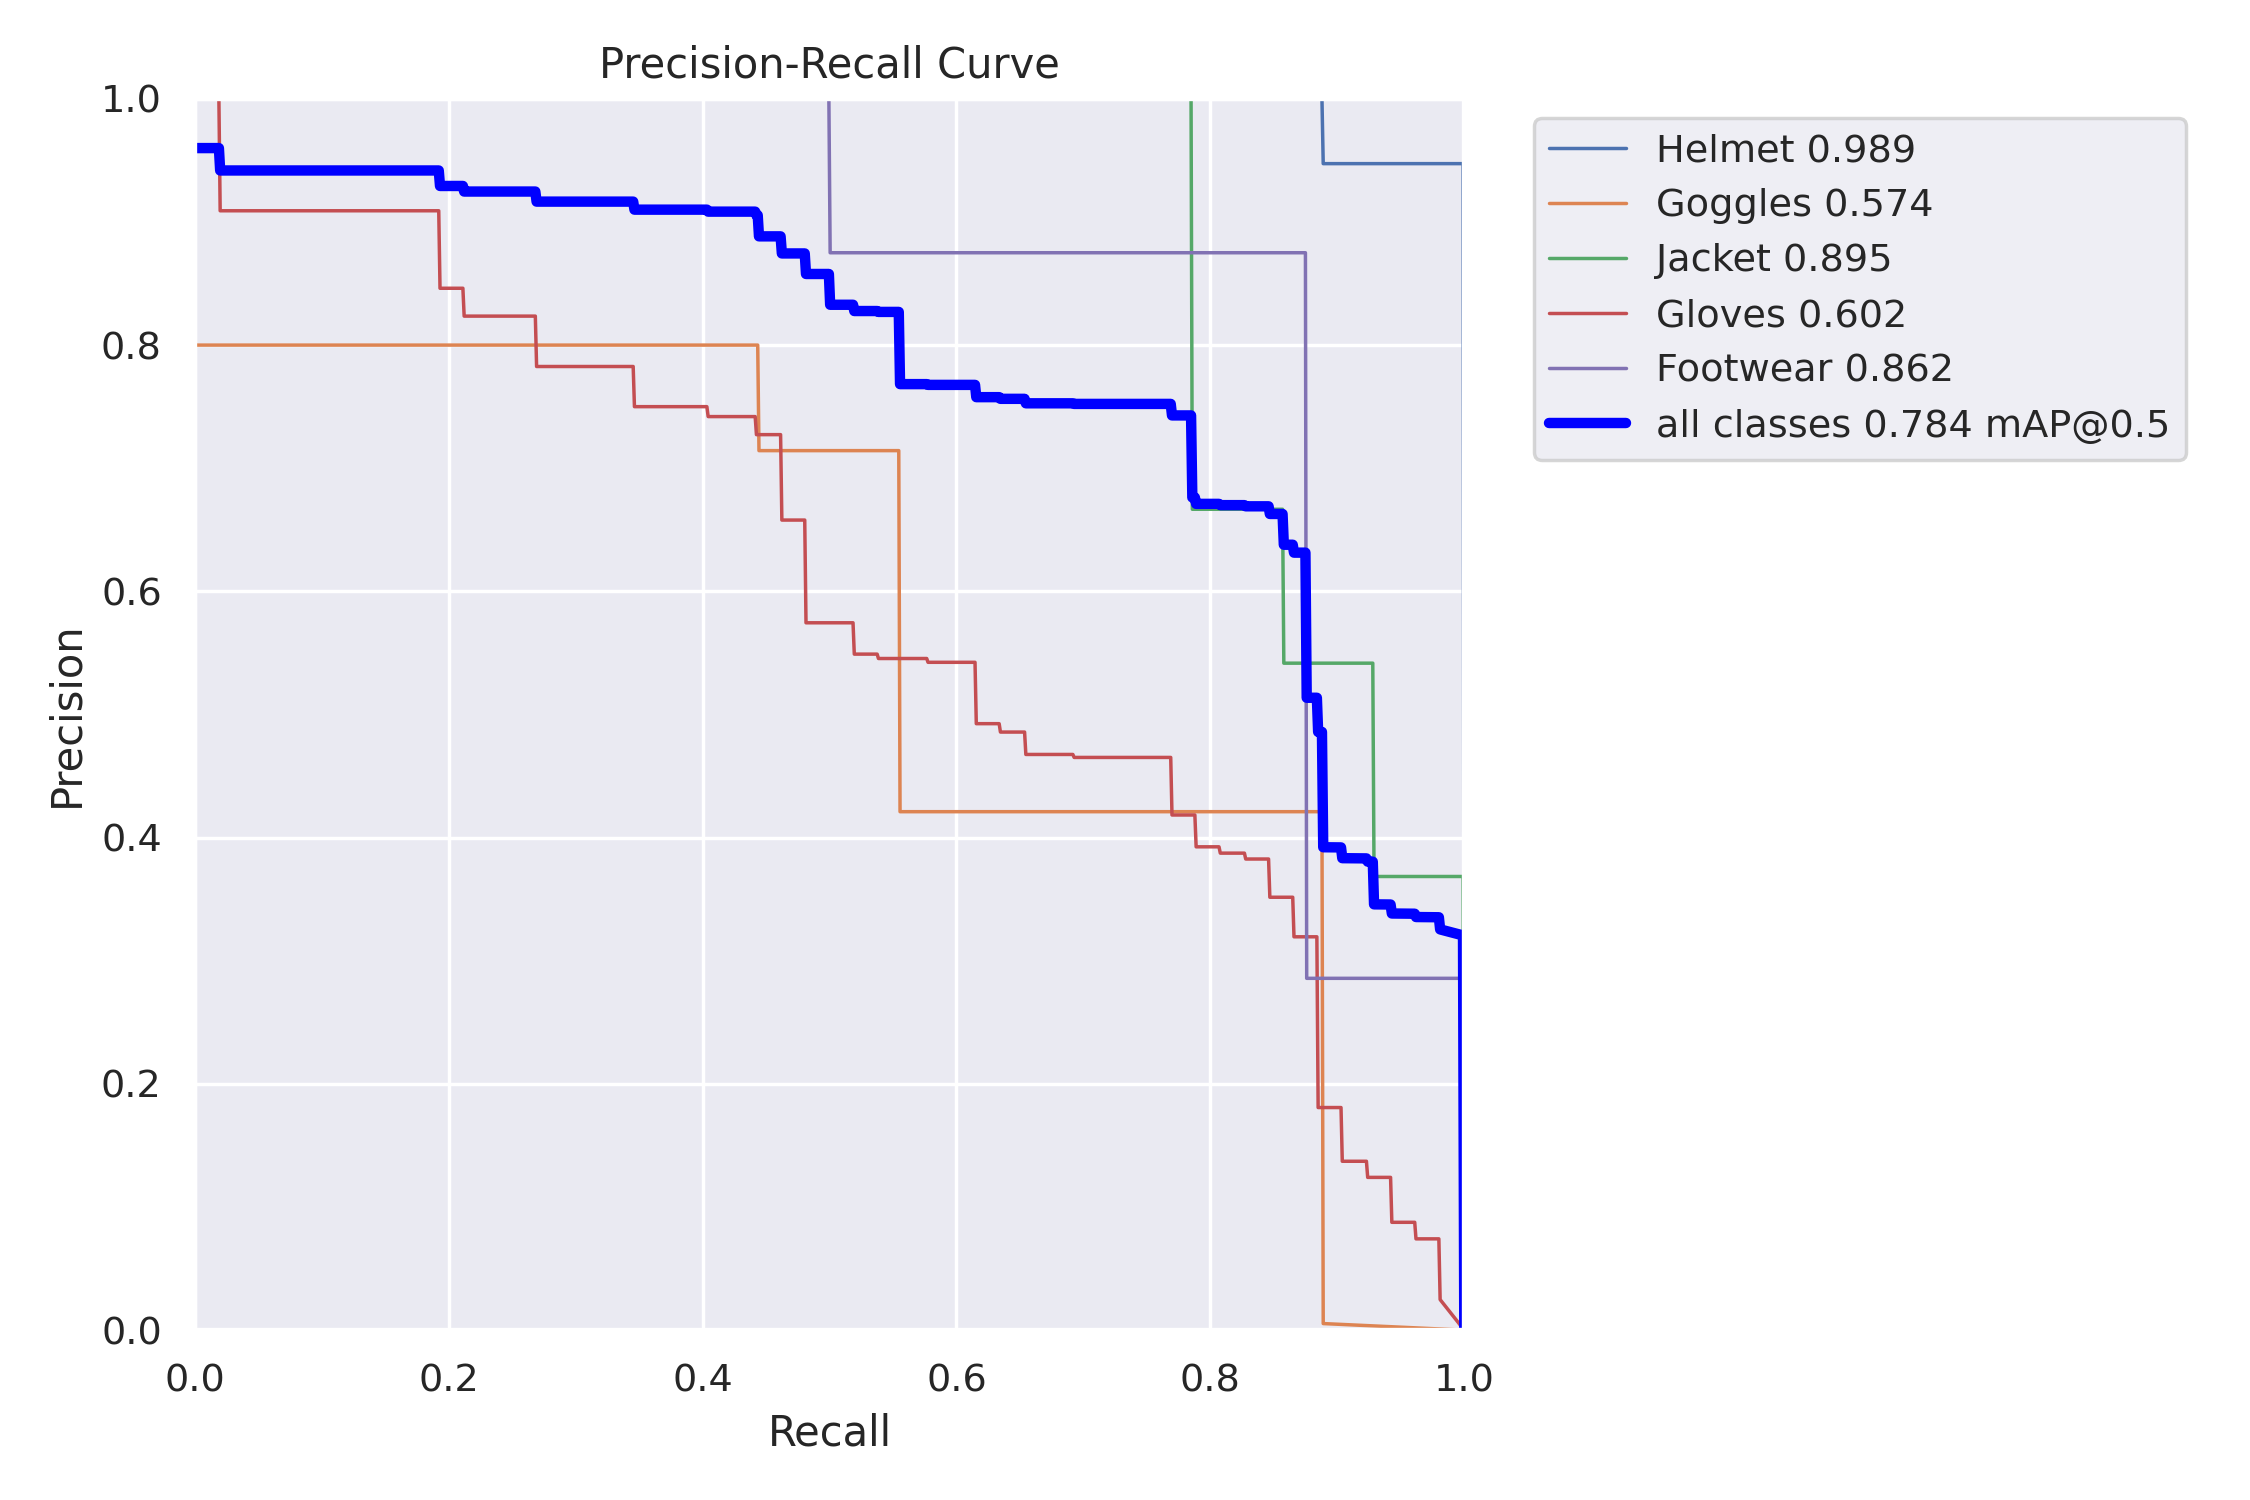

In [ ]:
Image(filename='/content/drive/MyDrive/YOLO/runs/detect/train/PR_curve.png',width=650)

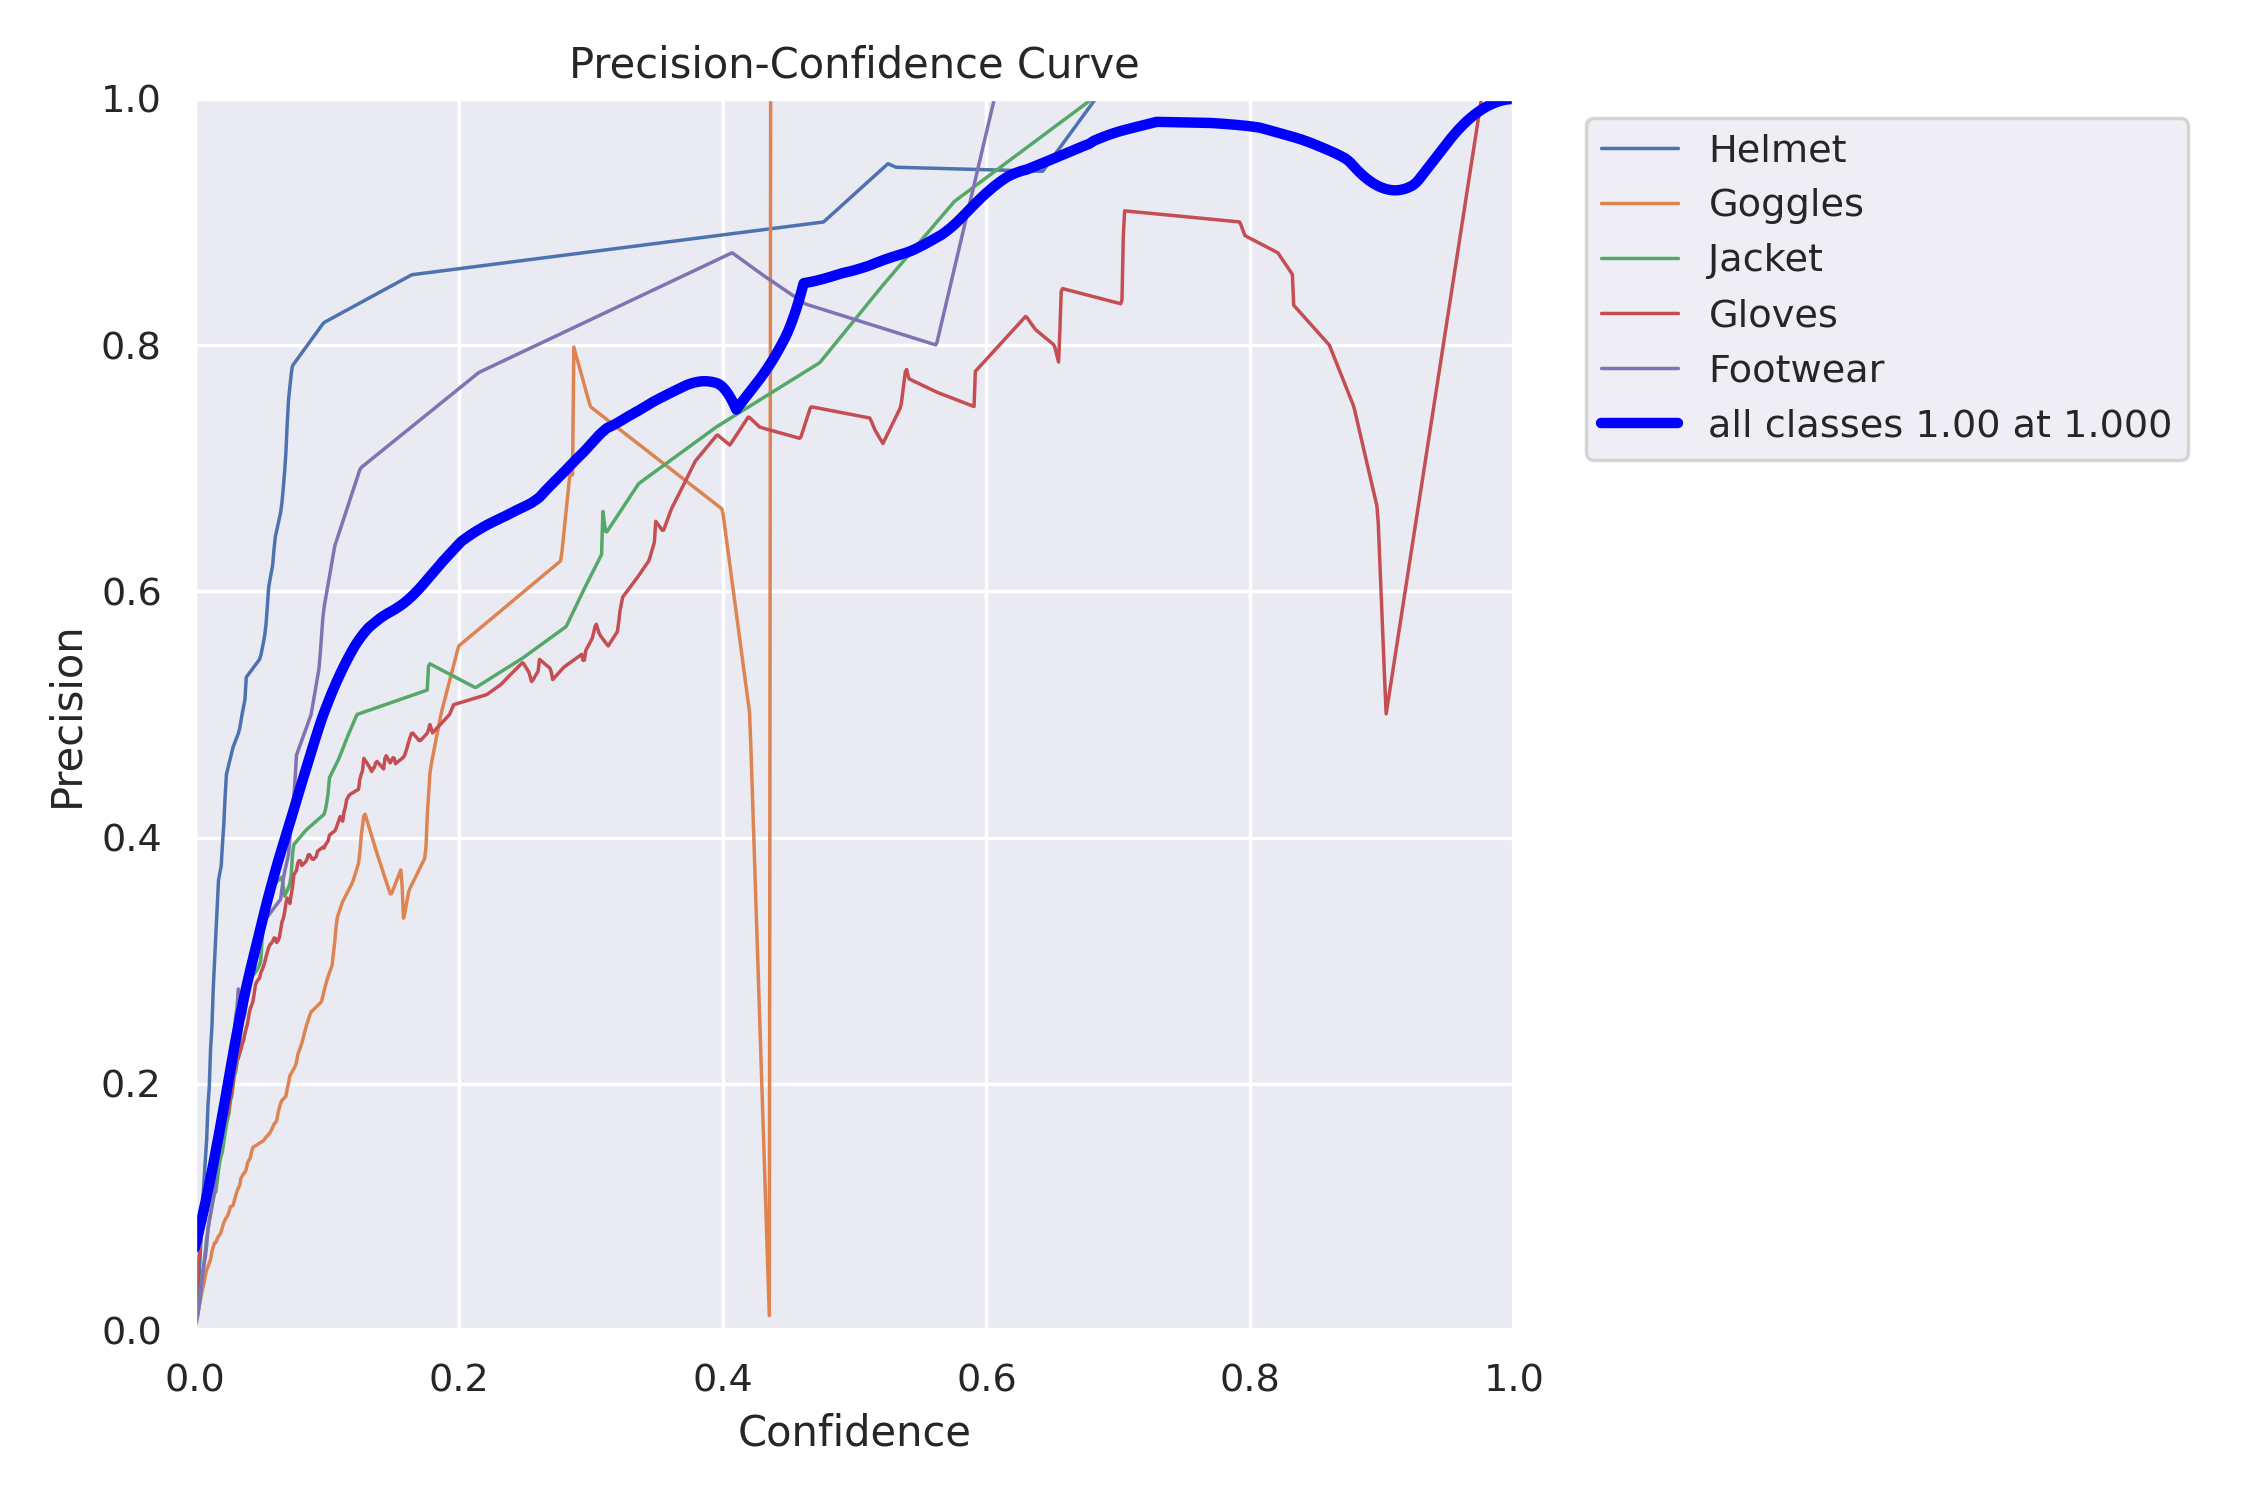

In [ ]:
Image(filename='/content/drive/MyDrive/YOLO/runs/detect/train/P_curve.png',width=650)

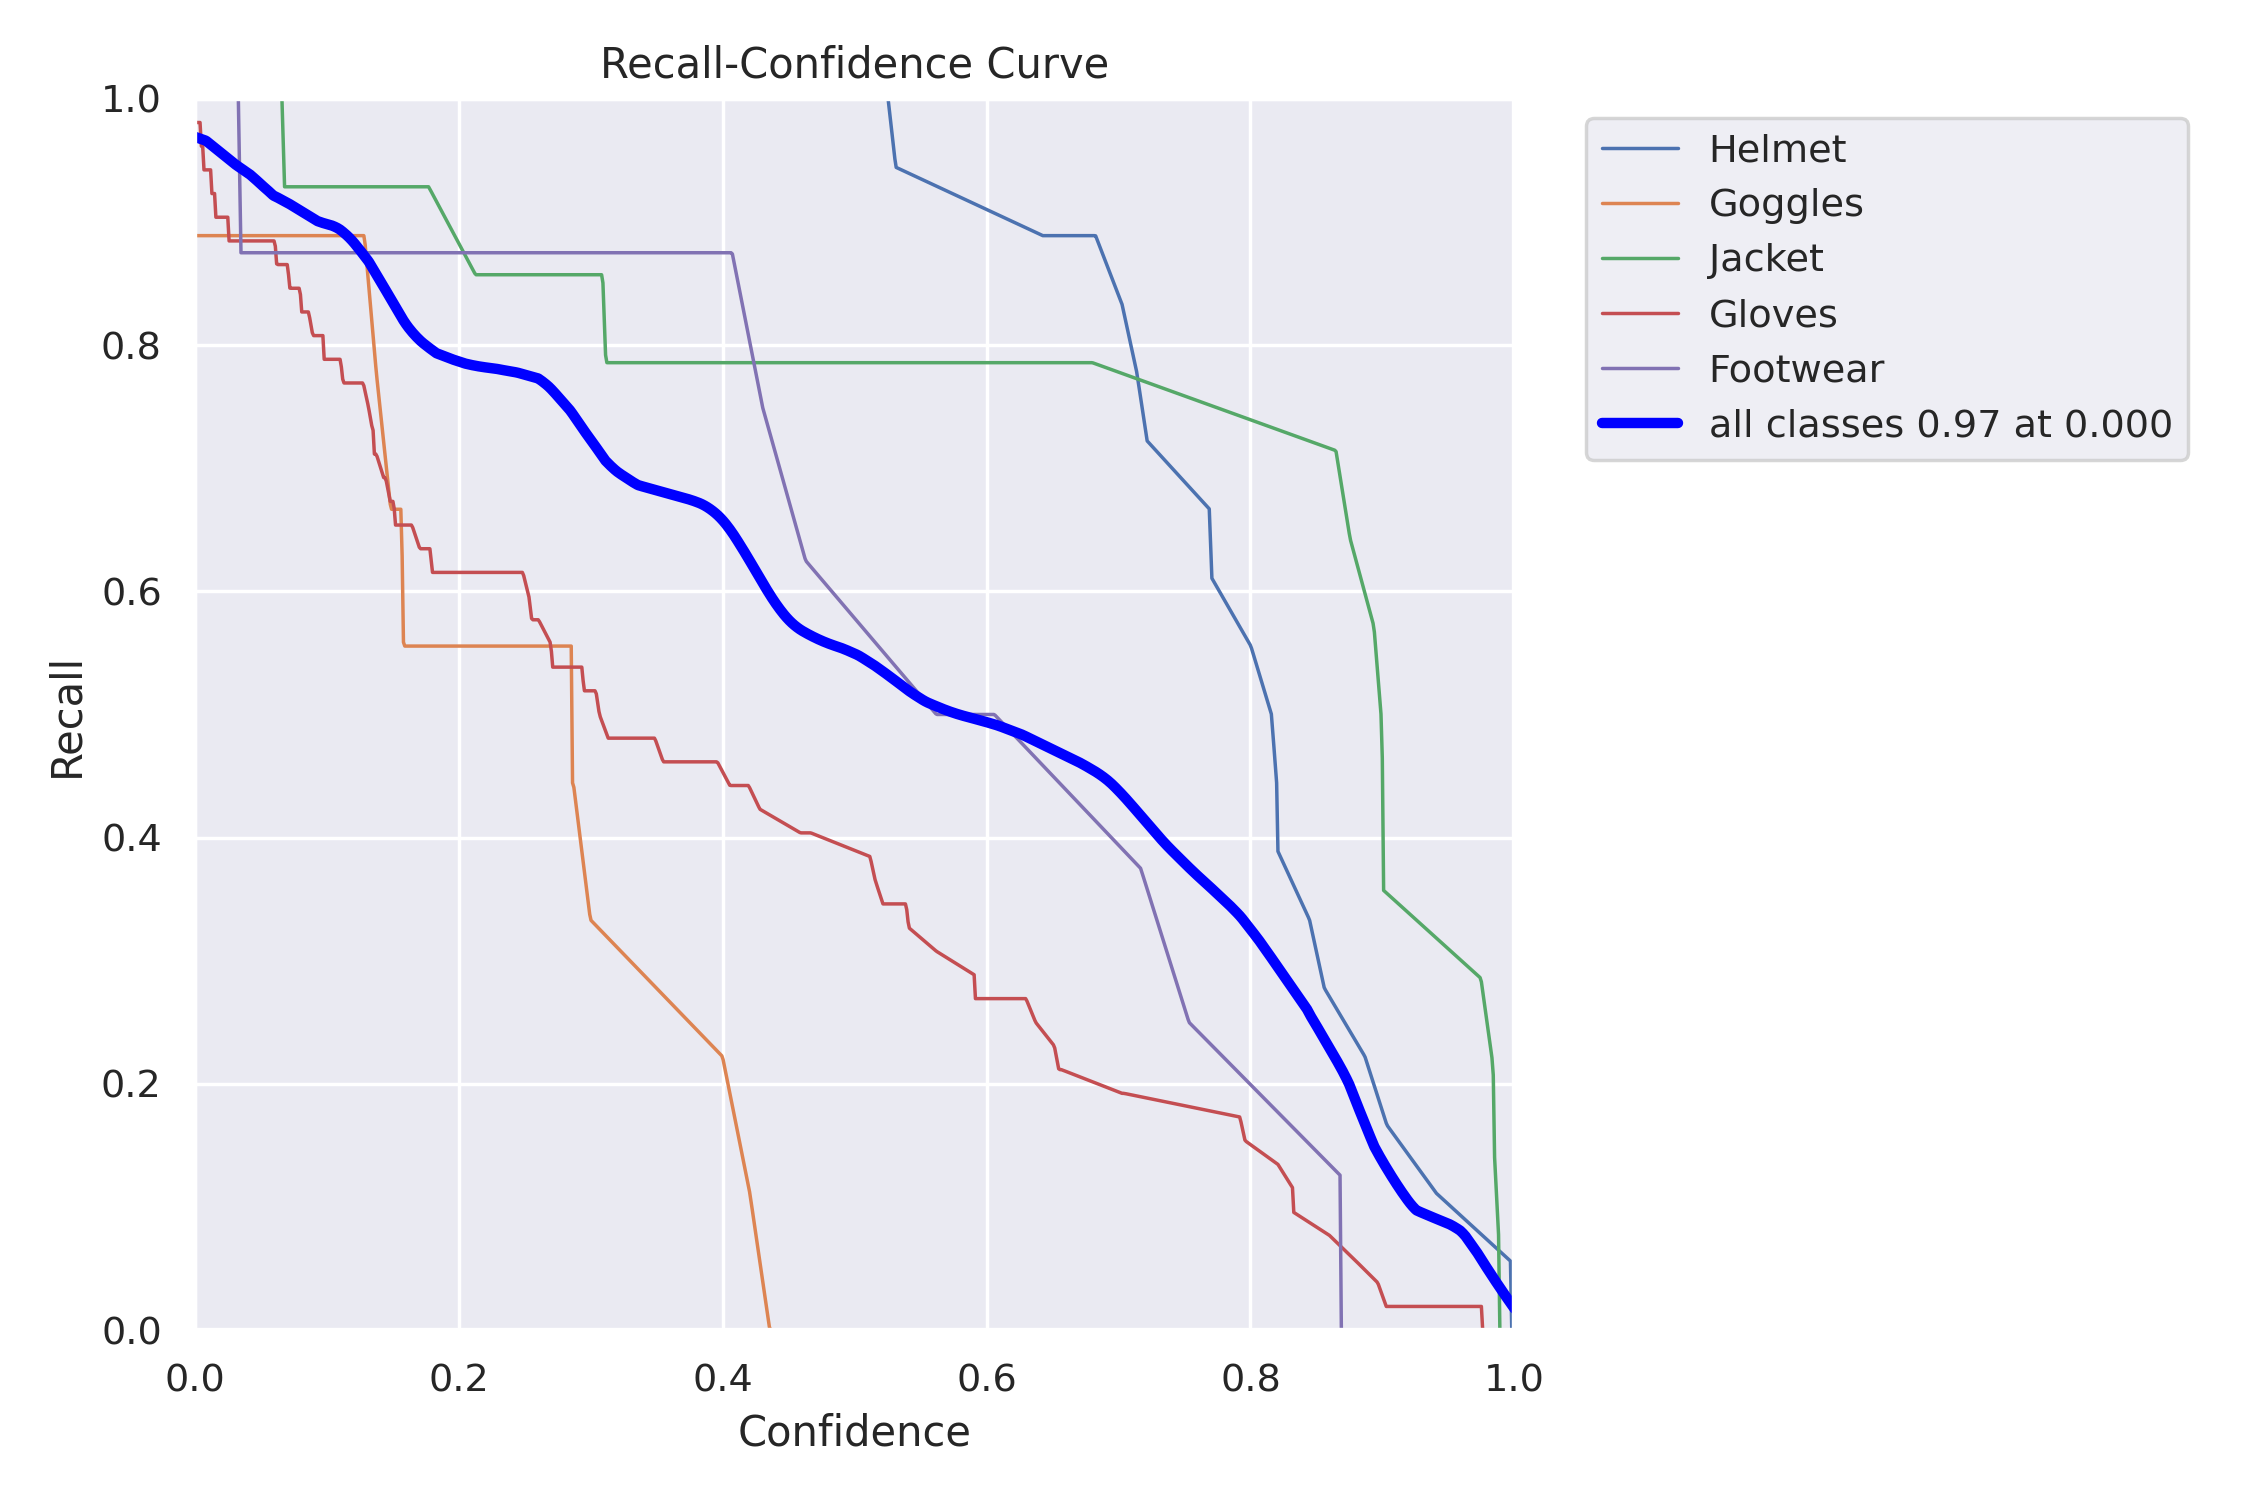

In [ ]:
Image(filename='/content/drive/MyDrive/YOLO/runs/detect/train/R_curve.png',width=650)

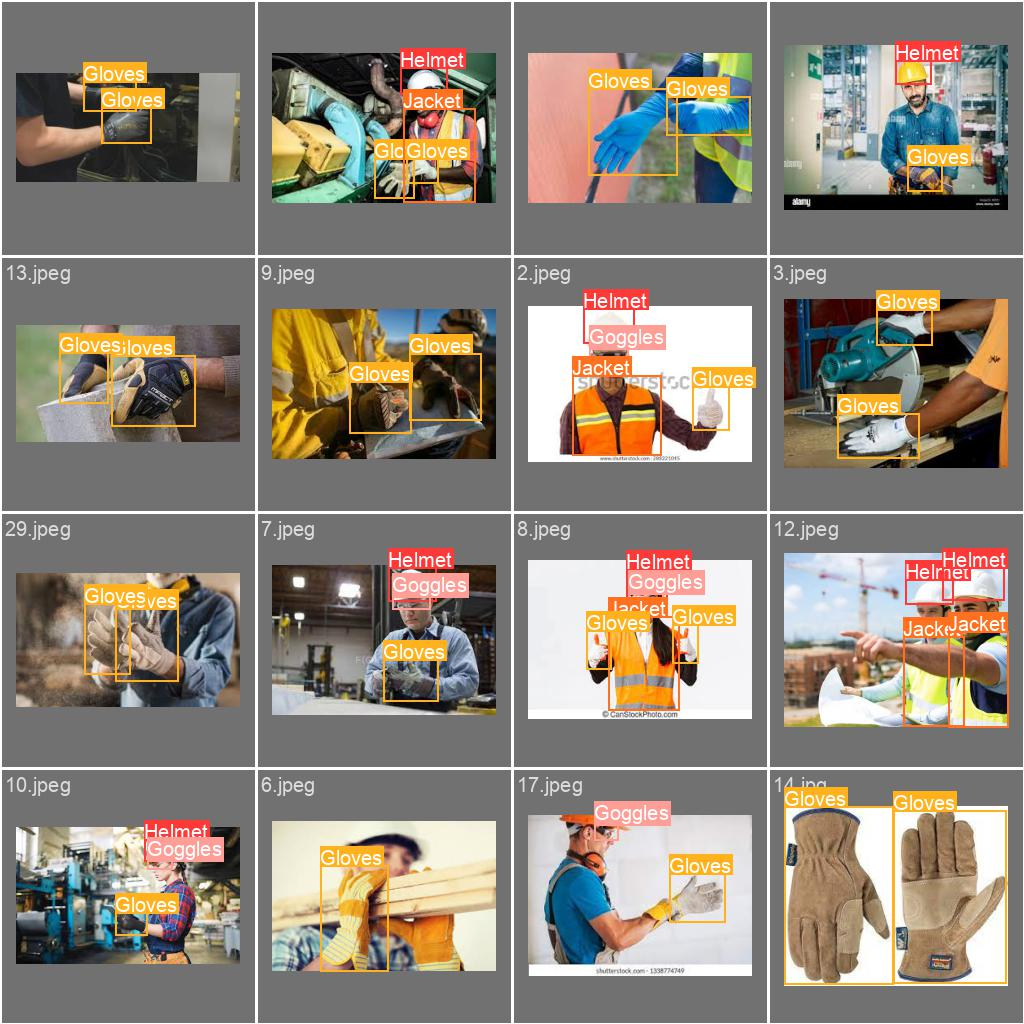

In [23]:
Image(filename='/content/drive/MyDrive/YOLO/runs/detect/train/val_batch0_labels.jpg',width=650)

VALIDATE THE CUSTOM MODEL

In [25]:
!yolo task=detect mode=val model='/content/drive/MyDrive/YOLO/runs/detect/train/weights/best.pt' data=data.yaml

2023-06-05 17:38:49.282492: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 17:38:50.204404: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/YOLO/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  3.20it/s]
                   all         31        101      0.669       0.79      0.804      0.447
                Helmet         31         18     

INFERENCE WITH CUSTOM MODEL

In [33]:
!yolo task=detect mode=predict model='/content/drive/MyDrive/YOLO/runs/detect/train/weights/best.pt' conf=0.25 source=data/test/images save=True

2023-06-05 17:51:48.399953: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 17:51:49.583450: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/31 /content/drive/MyDrive/YOLO/data/test/images/1.jpeg: 192x224 1 Helmet, 2 Goggless, 1 Jacket, 5 Glovess, 88.1ms
image 2/31 /content/drive/MyDrive/YOLO/data/test/images/10.jpeg: 160x224 2 Glovess, 55.7ms
image 3/31 /content/drive/MyDrive/YOLO/data/test/images/11.jpeg: 224x224 2 Glovess, 8.1ms
image 4/31 /content/drive/MyDrive/YOLO/data/test/images/12.jpeg: 192x224 2 Glovess, 8.5ms
ima

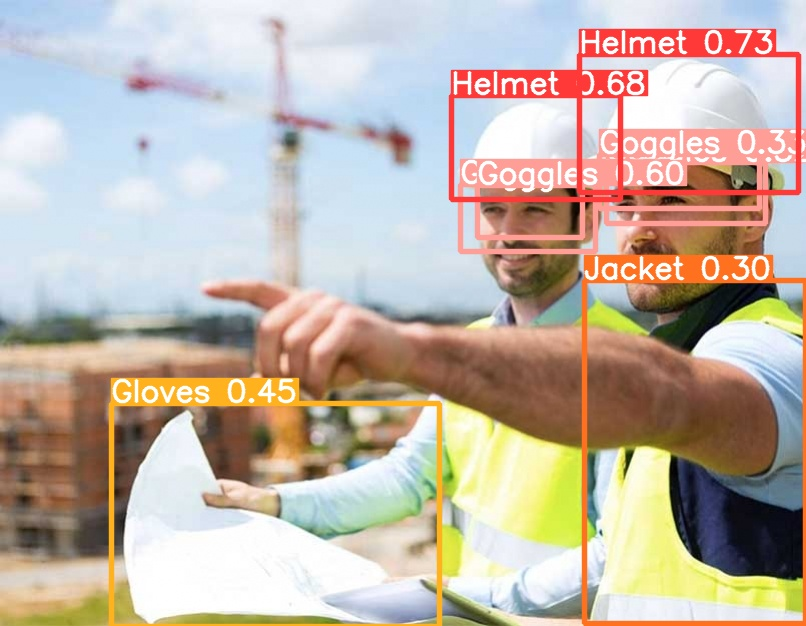

In [35]:
import glob
from IPython.display import Image,display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=image_path, width=650))
  print("\n")